In [5]:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
   

%matplotlib inline

In [7]:
#Loading the data:
cab_data = pd.read_csv('C:/users/212586594/Desktop/All_Imp/data Science/assignmnet/Portfolio/Portfolio_3/input/train_cab/train_cab.csv')


In [9]:
test_cab_data = pd.read_csv('C:/users/212586594/Desktop/All_Imp/data Science/assignmnet/Portfolio/Portfolio_3/input/test/test.csv')

## Understanding the data :

In [10]:
cab_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [6]:
test_cab_data.head() 

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [7]:
print("shape of training data is: ",cab_data.shape) #checking the number of rows and columns in training data
print("shape of test data is: ",test_cab_data.shape) #checking the number of rows and columns in test data

shape of training data is:  (16067, 7)
shape of test data is:  (9914, 6)


In [11]:
cab_data.describe() 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16066.000000,16066.000000,16066.000000,16066.000000,16011.000000
mean,15.041092,-72.462693,39.914675,-72.462233,39.897852,2.625171
std,430.473413,10.578707,6.826797,10.575384,6.187276,60.846021
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734935,-73.991182,40.734647,1.000000
50%,8.500000,-73.981697,40.752605,-73.980170,40.753566,1.000000
75%,12.500000,-73.966837,40.767381,-73.963642,40.768015,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [12]:
test_cab_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [16]:
cab_data=cab_data.dropna(subset= ["pickup_datetime"])   #dropping NA values in datetime column

## Data Cleaning & Missing Value Analysis :

In [17]:
#Convert fare_amount from object to numeric
cab_data["fare_amount"] = pd.to_numeric(cab_data["fare_amount"],errors = "coerce")

In [18]:
cab_data.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [20]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
cab_data['pickup_datetime'] =  pd.to_datetime(cab_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [21]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

cab_data['year'] = cab_data['pickup_datetime'].dt.year
cab_data['Month'] = cab_data['pickup_datetime'].dt.month
cab_data['Date'] = cab_data['pickup_datetime'].dt.day
cab_data['Day'] = cab_data['pickup_datetime'].dt.dayofweek
cab_data['Hour'] = cab_data['pickup_datetime'].dt.hour
cab_data['Minute'] = cab_data['pickup_datetime'].dt.minute

In [24]:
test_cab_data["pickup_datetime"] = pd.to_datetime(test_cab_data["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [25]:


test_cab_data['year'] = test_cab_data['pickup_datetime'].dt.year
test_cab_data['Month'] = test_cab_data['pickup_datetime'].dt.month
test_cab_data['Date'] = test_cab_data['pickup_datetime'].dt.day
test_cab_data['Day'] = test_cab_data['pickup_datetime'].dt.dayofweek
test_cab_data['Hour'] = test_cab_data['pickup_datetime'].dt.hour
test_cab_data['Minute'] = test_cab_data['pickup_datetime'].dt.minute

Below things found

1. A junks value in pickup date of 43 is removed
2. Passenger count should not exceed 6, as car are max 6 seater
3. Latitudes range from -90 to 90. Longitudes range from -180 to 180
4. Few missing values and High values of fare and Passenger count are present. So, decided to remove them.

Checking the Datetime Variable : 

In [28]:
#removing datetime missing values rows
cab_data = cab_data.drop(cab_data[cab_data['pickup_datetime'].isnull()].index, axis=0)
print(cab_data.shape)
print(cab_data['pickup_datetime'].isnull().sum())

(16066, 13)
0


We can see maximum number of passanger count is 5345 which is actually not possible. So reducing the passenger count to 6 (even if we consider the SUV)

In [31]:
cab_data = cab_data.drop(cab_data[cab_data["passenger_count"]> 6 ].index, axis=0)

#Also removing the values with passenger count of 0.
cab_data = cab_data.drop(cab_data[cab_data["passenger_count"] == 0 ].index, axis=0)

In [32]:
#removing passanger_count missing values rows
cab_data = cab_data.drop(cab_data[cab_data['passenger_count'].isnull()].index, axis=0)
print(cab_data.shape)
print(cab_data['passenger_count'].isnull().sum())

(15934, 13)
0


There is one passenger count value of 0.12 which is not possible. Hence we will remove fractional passenger value

In [33]:
cab_data = cab_data.drop(cab_data[cab_data["passenger_count"] == 0.12 ].index, axis=0)
cab_data.shape

(15933, 13)

Next checking the Fare Amount variable :

In [38]:
from collections  import Counter
Counter(cab_data["fare_amount"]<0)

cab_data = cab_data.drop(cab_data[cab_data["fare_amount"]<0].index, axis=0)


##make sure there is no negative values in the fare_amount variable column
cab_data["fare_amount"].min()

#Also remove the row where fare amount is zero
cab_data = cab_data.drop(cab_data[cab_data["fare_amount"]<1].index, axis=0)


#Now we can see that there is a huge difference in 1st 2nd and 3rd position in decending order of fare amount
# so we will remove the rows having fare amounting more that 454 as considering them as outliers

cab_data = cab_data.drop(cab_data[cab_data["fare_amount"]> 454 ].index, axis=0)


# eliminating rows for which value of "fare_amount" is missing
cab_data = cab_data.drop(cab_data[cab_data['fare_amount'].isnull()].index, axis=0)
print(cab_data.shape)
print(cab_data['fare_amount'].isnull().sum())

Counter({False: 15930, True: 3})

Now checking the pickup lattitude and longitude :

In [45]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#train = train.drop(train[train['pickup_latitude']<-90])
cab_data[cab_data['pickup_latitude']<-90]
cab_data[cab_data['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5685,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011,7,30,5,11,15


In [46]:
#Hence dropping one value of >90
cab_data = cab_data.drop((cab_data[cab_data['pickup_latitude']<-90]).index, axis=0)
cab_data = cab_data.drop((cab_data[cab_data['pickup_latitude']>90]).index, axis=0)


### Now we have successfully cleared our both datasets. Thus proceeding for further operations:

Calculating distance based on the given coordinates :


In [48]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min 

In [49]:
cab_data['distance'] = cab_data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [50]:
test_cab_data['distance'] = test_cab_data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [51]:
cab_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51,1.999157


In [52]:
test_cab_data.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [54]:
###we will remove the rows whose distance value is zero

cab_data = cab_data.drop(cab_data[cab_data['distance']== 0].index, axis=0)
cab_data.shape

(15448, 14)

In [55]:
#we will remove the rows whose distance values is very high which is more than 129kms
cab_data = cab_data.drop(cab_data[cab_data['distance'] > 130 ].index, axis=0)
cab_data.shape

(15425, 14)

In [59]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


Now we have splitted the pickup date time variable into different varaibles like month, year, day etc so now we dont need to have that pickup_Date variable now. Hence we can drop that, Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

In [56]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
cab_data = cab_data.drop(drop, axis = 1)

In [57]:
cab_data.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009,6,15,0,17,1.030764
1,16.9,1.0,2010,1,5,1,16,8.450134
2,5.7,2.0,2011,8,18,3,0,1.389525
3,7.7,1.0,2012,4,21,5,4,2.799270
4,5.3,1.0,2010,3,9,1,7,1.999157


In [58]:
cab_data['passenger_count'] = cab_data['passenger_count'].astype('int64')
cab_data['year'] = cab_data['year'].astype('int64')
cab_data['Month'] = cab_data['Month'].astype('int64')
cab_data['Date'] = cab_data['Date'].astype('int64')
cab_data['Day'] = cab_data['Day'].astype('int64')
cab_data['Hour'] = cab_data['Hour'].astype('int64')

In [60]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test_cab_data = test_cab_data.drop(drop_test, axis = 1)

**Let see the data variance and how it is distributed to mind any corelatuion**



1. Number of Passengers effects the the fare
2. Pickup date and time effects the fare
3. Day of the week does effects the fare
4. Distance effects the fare

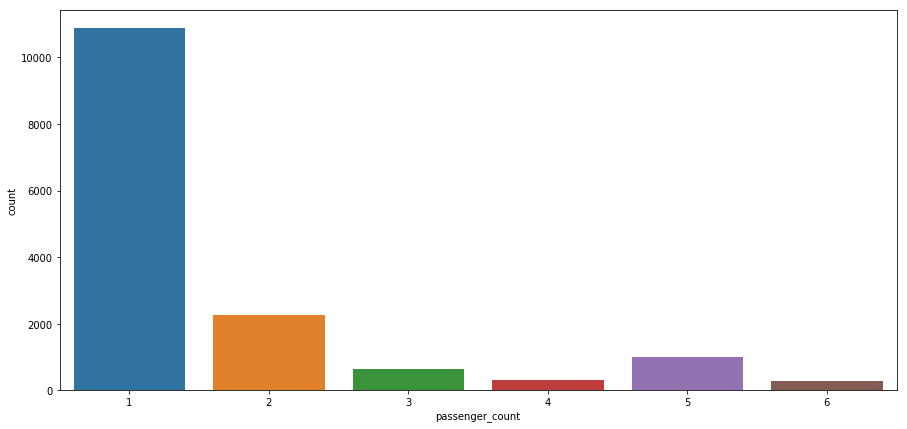

In [62]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=cab_data)

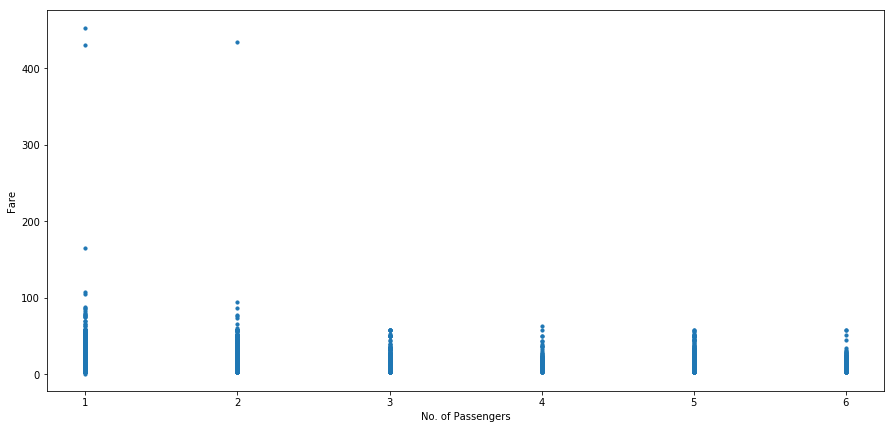

In [63]:
#Relationship beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=cab_data['passenger_count'], y=cab_data['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()


   By seeing the above plots we can easily conclude that:
1. single travelling passengers are most frequent travellers.
2. At the sametime we can also conclude that highest Fare are coming from single & double travelling passengers.

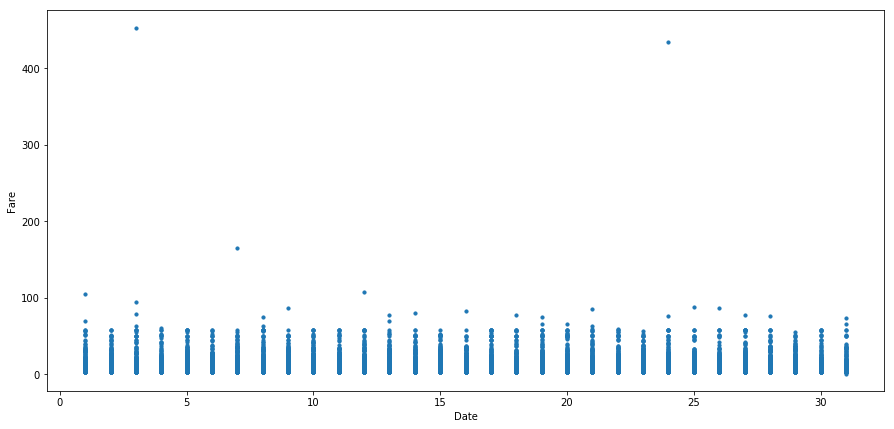

In [71]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

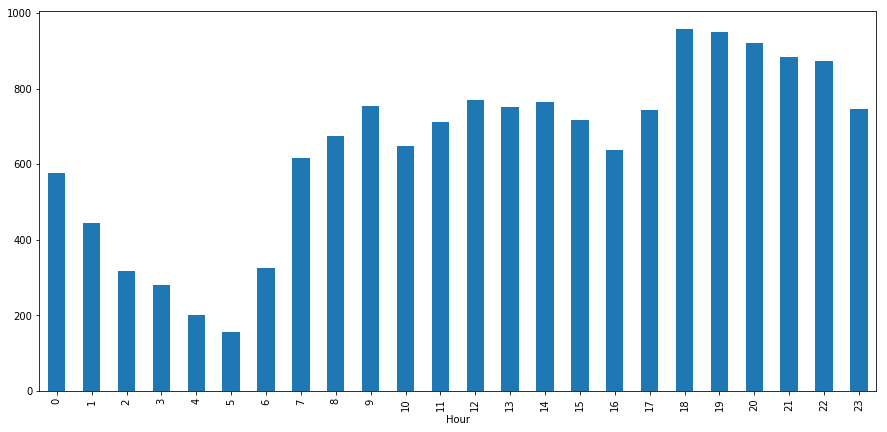

In [64]:
plt.figure(figsize=(15,7))
cab_data.groupby(cab_data["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours

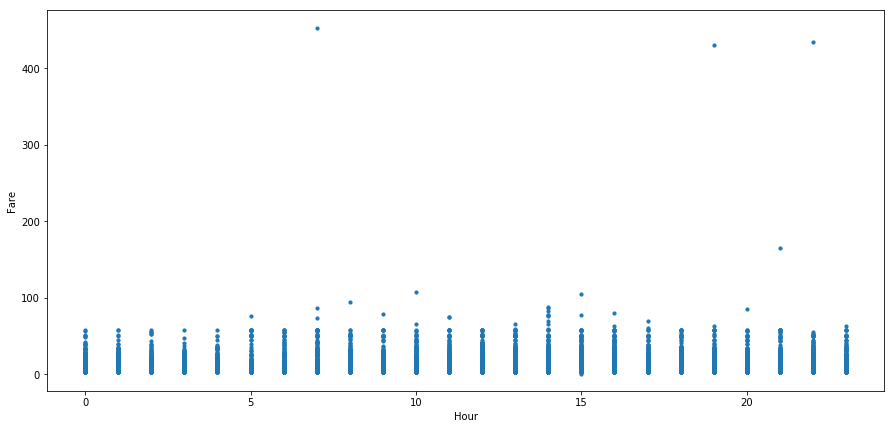

In [65]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=cab_data['Hour'], y=cab_data['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

From the above plot We can observe that the cabs taken at 7 am and 23 Pm are the costliest. 
Hence we can assume that cabs taken early in morning and late at night are costliest


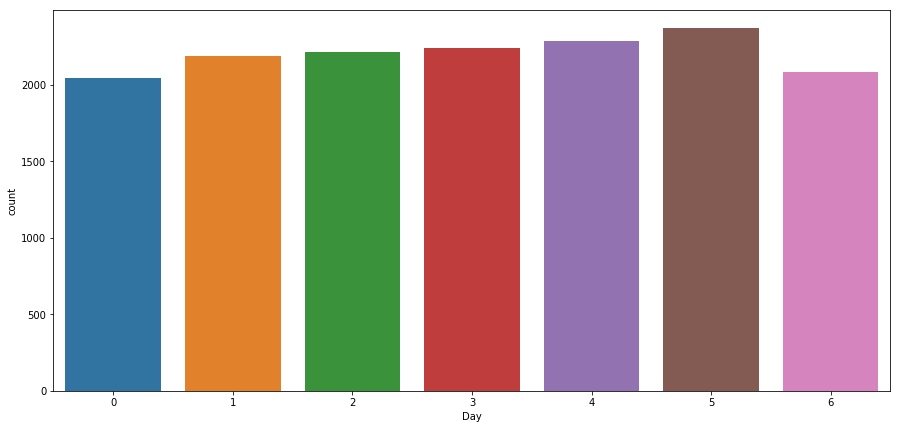

In [66]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=cab_data)

Observation :
The day of the week does not seem to have much influence on the number of cabs ride

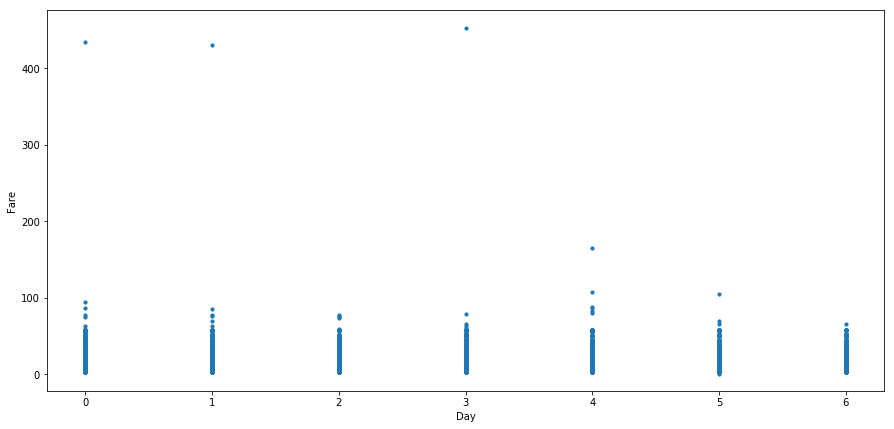

In [67]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=cab_data['Day'], y=cab_data['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

The highest fares seem to be on a Sunday, Monday and Thursday, and the low on Wednesday and Saturday. May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices

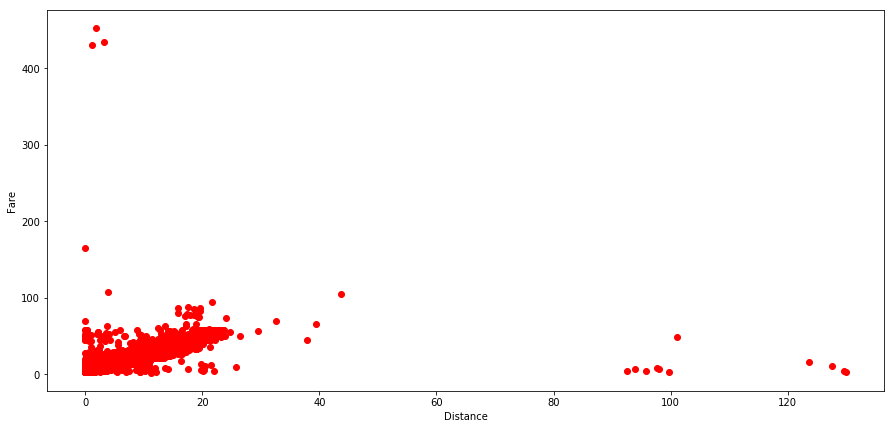

In [110]:
#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = cab_data['distance'],y = cab_data['fare_amount'],c = "r")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

It is quite obvious that distance will effect the amount of fare

# Feature Scaling :

fare_amount


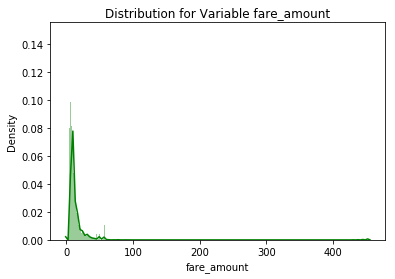

distance


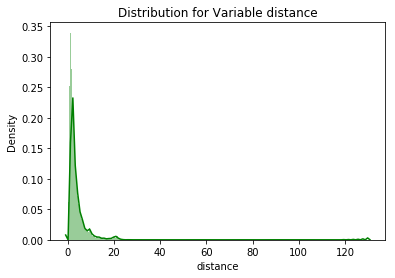

In [77]:
#Normality check of training data is uniformly distributed or not-

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [78]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

fare_amount


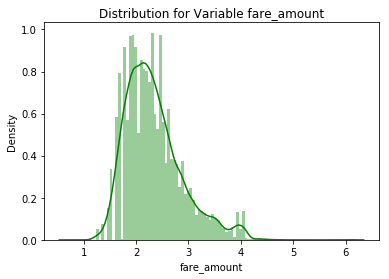

distance


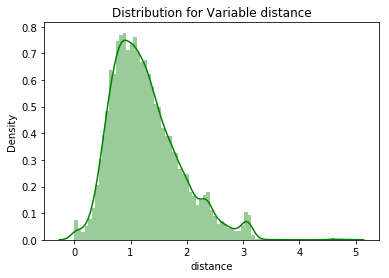

In [79]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

Here we can see bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any  Feature Scalling technique. i.e, Normalization or Standarization for our training data

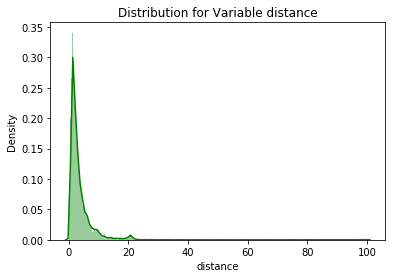

In [80]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [81]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

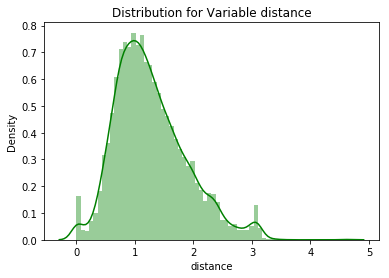

In [82]:
#rechecking the distribution for distance
sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()


As we can see a bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any  Feature Scalling technique. i.e, Normalization or Standarization for our test data

# Applying ML ALgorithms: 

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [71]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( cab_data.iloc[:, cab_data.columns != 'fare_amount'], 
                         cab_data.iloc[:, 0], test_size = 0.20, random_state = 1)

### Linear Regression Model :

In [72]:

fit_LR = LinearRegression().fit(X_train , y_train)

In [73]:

pred_train_LR = fit_LR.predict(X_train)

In [74]:

pred_test_LR = fit_LR.predict(X_test)

In [75]:
##calculating RMSE for test data
from sklearn.metrics import mean_squared_error

RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [76]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 9.714468826740381
Root Mean Squared Error For Test data = 5.696514861313625


In [77]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.30559888217797115

In [78]:
r2_score(y_test, pred_test_LR)

0.6076799836419702

### Decision tree Model : 

In [79]:
from sklearn.tree import DecisionTreeRegressor


In [80]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [81]:

pred_train_DT = fit_DT.predict(X_train)

pred_test_DT = fit_DT.predict(X_test)

In [82]:

RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))


RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [83]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 8.459402871837131
Root Mean Squared Error For Test data = 4.758817935730962


In [84]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.4734353380219126

In [85]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.7262083641085088

### Random Forest Model :

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:

fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [88]:

pred_train_RF = fit_RF.predict(X_train)

pred_test_RF = fit_RF.predict(X_test)

In [89]:

RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))

RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [90]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 3.176944115154854
Root Mean Squared Error For Test data = 6.3315676152780584


In [91]:
## calculate R^2 for train data

r2_score(y_train, pred_train_RF)

0.9257337587619018

In [92]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.5153318339411506

# Prediction of fare from provided test dataset :

Using  Random forest model due to high accuracy comapared to others

In [97]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [98]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
##Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 7, 'max_depth': 65}
R-squared = 0.053.
RMSE =  8.84857913598728


In [99]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.62.
RMSE =  5.6241430400317


In [101]:
## Grid Search CV for gradinet boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.61.
RMSE =  5.70172845822991


In [103]:
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(test_cab_data)

In [104]:
predictions_GRF_test_Df

array([ 9.06155438,  9.25927742,  5.47559371, ..., 51.09225593,
       25.32365047,  5.6319028 ])

In [105]:
test_cab_data['Predicted_fare'] = predictions_GRF_test_Df

In [107]:
test_cab_data.head()

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,2.323259,9.061554
1,1,2015,1,27,1,13,2.425353,9.259277
2,1,2011,10,8,5,11,0.618628,5.475594
3,1,2012,12,1,5,21,1.961033,9.522468
4,1,2012,12,1,5,21,5.387301,14.713733


In [109]:
test_cab_data.to_csv('C:/users/212586594/Desktop/All_Imp/data Science/assignmnet/Portfolio/Portfolio_3/all_predicted_fare.csv')

In [95]:
predictions_RF = fit_RF.predict(test_cab_data)

In [96]:
test.to_csv('C:/users/212586594/Desktop/All_Imp/data Science/assignmnet/Portfolio/Portfolio_3/prediction_fare_randomforest.csv')

NameError: name 'test' is not defined